In [48]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
from networkx.drawing.nx_pydot import graphviz_layout

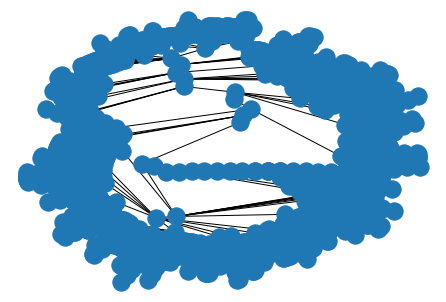

In [51]:
T = nx.Graph()
labels = []

with open('imagenet_mintree.txt', 'r') as f:
    for line in f.readlines():
        nodes = line.split()
        for node in nodes:
            if node not in T:
                T.add_node(node)
        T.add_edge(*nodes)
        
leaves = [x for x in T.nodes() if T.degree(x) == 1]
labels = np.array(leaves)

pos = graphviz_layout(T, prog="twopi")
nx.draw(T, pos, with_labels=False)

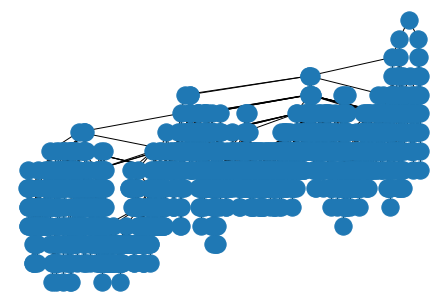

In [52]:
pos = graphviz_layout(T, prog="dot")
nx.draw(T, pos, with_labels=False)

In [58]:
# From https://github.com/cvjena/semantic-embeddings

100%|██████████| 1000/1000 [01:07<00:00, 14.79it/s]


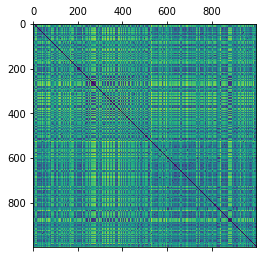

In [57]:
d = np.zeros((len(labels), len(labels)))

for i in tqdm(range(len(labels))):
    for j in range(i+1, len(labels)):
        d[i, j] = nx.shortest_path_length(T, labels[i], labels[j])
        d[j, i] = d[i, j]

plt.matshow(d)
plt.show()

In [65]:
def fréchet_mean(dist, cands, weights):
    assert(len(cands) == len(weights))
    mean = [[weights[i] * d[j, cands[i]] for i in range(len(cands))] for j in range(len(dist))]
    mean = np.array(mean).sum(axis=1)
    argmins = np.where(mean == mean.min())[0]
    # TODO figure out what to do in non-unique situations
    if len(argmins) > 1:
        print(f"[FRÉCHET MEAN] non-unique, {len(argmins)} argminima: {argmins}")
    return argmins[0] # NOTE arbitrarily choosing first argminimum
    
    
nodes = [496, 501, 1, 500]
fréchet_mean(d, nodes, np.ones_like(nodes))

# Can at least get closer to semantic class
# [PROVE] Seems like it's not possible to get full extent without all of the leaves? 
# Or maybe this only applies to certain types of trees? E.g., "balanced" trees?


512